<a href="https://colab.research.google.com/github/imperialHCE/theprojects/blob/master/Credit_Card_Fraud_Detection_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Feature Scalling

In [ ]:
#RobustScaler is less prone to outliers
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis = 1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Classes Count in Credit Card Fruad Dataset 
 0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

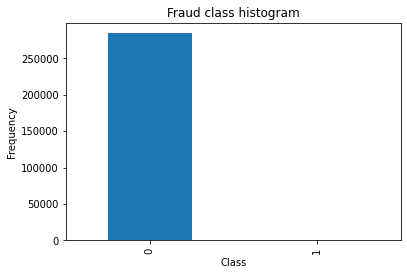

In [ ]:
# Imbalanced Classes


print(f'Classes Count in Credit Card Fruad Dataset \n', pd.value_counts(df['Class'], sort = True).sort_index())
credit_classes = pd.value_counts(df['Class'], sort = True).sort_index()
credit_classes.plot(kind = 'bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')


In [ ]:
#Creating independent and dependent features

columns = df.columns.tolist()

#Filter the Columns

columns = [c for c in columns if c not in ['Class']]
print(columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']


In [ ]:
#Store the variable we are predicting

target = 'Class'

#define X and Y df

X =  df[columns]
Y = df[target]

print(X.shape)
print(Y.shape)


(284807, 30)
(284807,)


In [ ]:
#Undersampling
nm = RandomUnderSampler(random_state=42)
X_us, y_us = nm.fit_resample(X,Y)
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.2)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_us))

Resampled dataset shape Counter({0: 492, 1: 492})


In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy=1)
X_os, y_os = os.fit_resample(X,Y)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2)


Now we will be looking at what metrics are well suitable for the credit card fraud detection problem and will try to work on a few supervised machine learning models and perform hyper tuning to get the best results.

Choosing the Right Metrics for Model
As the analysis is focused on credit card fraud detection, we will evaluate the performance of the Model based on few metrics listed below:

Confusion Matrix

Accuracy, Recall, Precision and F1-Score

ROC Curve and AUC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logmodel= LogisticRegression()

param_grid = [
    {'penalty' : ['l2', 'l1', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000, 2500]
    }
]


logcls_us = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
bestlogcls_us = logcls_us.fit(X_train_us, y_train_us)
bestlogcls_us.best_estimator_
print(f'Accuracy - : {bestlogcls_us.score(X_train_us, y_train_us):.3f}')

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
def model_performance(y_test, y_pred):
  print(f'Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
  print(f'\n Recall:', recall_score(y_test, y_pred))
  print(f'\n Accuracy Score:', accuracy_score(y_test, y_pred))
  print(f'\n Precision Score:', precision_score(y_test, y_pred))
  print(f'\n F1 Score:' ,f1_score(y_test, y_pred))
  roc_curve(y_test, y_pred, pos_label=True)
  return


predict_us = bestlogcls_us.predict(X_test_us)
model_performance(y_test_us,predict_us)

Confusion Matrix:
 [[ 85   2]
 [  5 105]]

 Recall: 0.9545454545454546

 Accuracy Score: 0.9644670050761421

 Precision Score: 0.9813084112149533

 F1 Score: 0.967741935483871


As per as model performance, we received a recall score of 90%. Which states that 90% of the total Fraud transaction is correctly predicted by the classification model. The Accuracy score we got is 93%

Now let’s perform Logistic Regression on Over-Sampled Data and look at its performance:

In [ ]:
#logistic Regression for oversampling:
param_grid = {
'penalty' : ['l1', 'l2', 'none'],
'C' : np.logspace(-4, 4, 20),
'solver': ['lbfgs','newton-cg','liblinear'],
'max_iter' : [100, 1000]
}
logcls_os = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
bestlogcls_os = logcls_os.fit(X_train_os, y_train_os)
bestlogcls_os.estimator

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

LogisticRegression()

In [ ]:
predict_os = bestlogcls_os.predict(X_test_os)
model_performance(y_test_os,predict_os)

Confusion Matrix:
 [[55535  1407]
 [ 4484 52300]]

 Recall: 0.9210340941110172

 Accuracy Score: 0.9482000597928354

 Precision Score: 0.9738022976520752

 F1 Score: 0.9466834402802039
